In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models, layers
from keras.utils import to_categorical
from keras import optimizers
import model_utils as mu
from importlib import reload
from keras.preprocessing.image import ImageDataGenerator

#### Reading in Data and Creating Training and Validation Set

In [75]:
train_data = pd.read_csv('Data/train.csv').values
X, y = train_data[:, 1:], train_data[:, 0]
X = X.reshape((X.shape[0], 28, 28, 1))
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y)
y_train, y_val = to_categorical(y_train), to_categorical(y_val)

#### Instantiating ImageDataGenerator

In [143]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05, 
                                   zoom_range=0.025,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_data_generator = train_datagen.flow(X_train, y_train, batch_size=30)
val_data_generator = train_datagen.flow(X_val, y_val, batch_size=30)

In [178]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.ZeroPadding2D((1, 1)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.ZeroPadding2D((1, 1)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.ZeroPadding2D((1, 1)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [179]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Base Model

In [149]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 15s 475us/step - loss: 0.9772 - acc: 0.9939 - val_loss: 0.7899 - val_acc: 0.9943
Epoch 2/10
31500/31500 [==============================] - 15s 477us/step - loss: 0.6680 - acc: 0.9942 - val_loss: 0.6648 - val_acc: 0.9940
Epoch 3/10
31500/31500 [==============================] - 23s 734us/step - loss: 0.4991 - acc: 0.9944 - val_loss: 0.5969 - val_acc: 0.9928
Epoch 4/10
31500/31500 [==============================] - 18s 566us/step - loss: 0.3822 - acc: 0.9945 - val_loss: 0.4048 - val_acc: 0.9939
Epoch 5/10
31500/31500 [==============================] - 20s 647us/step - loss: 0.3106 - acc: 0.9945 - val_loss: 0.3348 - val_acc: 0.9939
Epoch 6/10
31500/31500 [==============================] - 25s 791us/step - loss: 0.2484 - acc: 0.9949 - val_loss: 0.2836 - val_acc: 0.9941
Epoch 7/10
31500/31500 [==============================] - 24s 759us/step - loss: 0.2074 - acc: 0.9950 - val_loss: 0.

#### Fitting using data augmentation

In [180]:
history = model.fit_generator(train_data_generator, steps_per_epoch=1050, epochs=250, validation_data=val_data_generator, validation_steps=50)

Epoch 1/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.2550 - acc: 0.9122 - val_loss: 0.1336 - val_acc: 0.9528
Epoch 2/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0891 - acc: 0.9683 - val_loss: 0.0857 - val_acc: 0.9771
Epoch 3/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0573 - acc: 0.9802 - val_loss: 0.0958 - val_acc: 0.9819- loss: 0.0586 - acc - ETA: 4s - loss: 0.0585 - acc: 0.97 - ETA: 3s - loss: 0.0585 - acc: 0.9 - ETA: 3s - 
Epoch 4/250
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0447 - acc: 0.9848 - val_loss: 0.0390 - val_acc: 0.9863
Epoch 5/250
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0372 - acc: 0.9874 - val_loss: 0.0225 - val_acc: 0.9881
Epoch 6/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0320 - acc: 0.9894 - val_loss: 0.0296 - val_acc: 0.9880
Epoch 7/250
1050/1050 [==============================] - 34s 32ms/step -

1050/1050 [==============================] - 31s 30ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0435 - val_acc: 0.9977
Epoch 59/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.0011 - val_acc: 0.99740.0066 -
Epoch 60/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0061 - val_acc: 0.9971
Epoch 61/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0063 - acc: 0.9979 - val_loss: 7.4485e-04 - val_acc: 0.9974
Epoch 62/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0067 - acc: 0.9979 - val_loss: 5.1289e-04 - val_acc: 0.9981
Epoch 63/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0062 - acc: 0.9980 - val_loss: 4.5895e-04 - val_acc: 0.9969
Epoch 64/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0062 - acc: 0.9980 - val_loss: 0.0027 - val_acc: 0.9980
Epoch 65/250
1050/1050 [===

1050/1050 [==============================] - 32s 31ms/step - loss: 0.0054 - acc: 0.9983 - val_loss: 2.2077e-04 - val_acc: 0.9977
Epoch 116/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0048 - acc: 0.9984 - val_loss: 6.5974e-04 - val_acc: 0.9972
Epoch 117/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0049 - acc: 0.9984 - val_loss: 6.1793e-04 - val_acc: 0.9985
Epoch 118/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0045 - acc: 0.9986 - val_loss: 4.1212e-05 - val_acc: 0.9978
Epoch 119/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0058 - val_acc: 0.9975s - loss: 0.0049 -
Epoch 120/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 4.6350e-04 - val_acc: 0.9977
Epoch 121/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0052 - acc: 0.9984 - val_loss: 1.7601e-04 - val_acc: 0.9972

1050/1050 [==============================] - 31s 29ms/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.0112 - val_acc: 0.9981
Epoch 173/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0024 - val_acc: 0.9985
Epoch 174/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0045 - acc: 0.9986 - val_loss: 7.7885e-04 - val_acc: 0.9975
Epoch 175/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0034 - val_acc: 0.9974
Epoch 176/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0045 - acc: 0.9988 - val_loss: 8.4685e-04 - val_acc: 0.9975
Epoch 177/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0041 - acc: 0.9988 - val_loss: 0.0109 - val_acc: 0.9981
Epoch 178/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0046 - acc: 0.9986 - val_loss: 1.7694e-06 - val_acc: 0.9973
Epoch 179/250
1050/1050 [====

1050/1050 [==============================] - 31s 30ms/step - loss: 0.0041 - acc: 0.9988 - val_loss: 2.5316e-05 - val_acc: 0.9958
Epoch 229/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0043 - acc: 0.9988 - val_loss: 0.0013 - val_acc: 0.9977
Epoch 230/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0042 - acc: 0.9988 - val_loss: 0.1091 - val_acc: 0.9982
Epoch 231/250
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0040 - acc: 0.9988 - val_loss: 8.1837e-04 - val_acc: 0.9971
Epoch 232/250
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0965 - val_acc: 0.9983
Epoch 233/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0041 - acc: 0.9988 - val_loss: 0.0129 - val_acc: 0.9973
Epoch 234/250
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0039 - val_acc: 0.9975
Epoch 235/250
1050/1050 [========

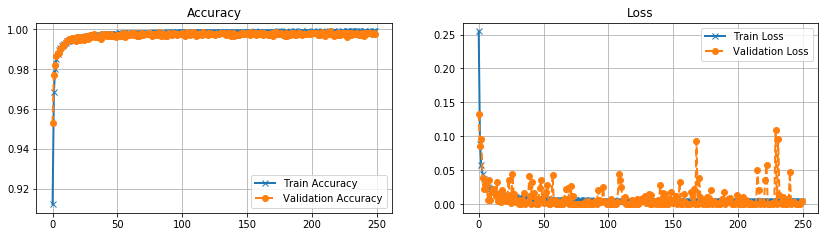

In [181]:
reload(mu)

mu.plot_history(history.history)